<a href="https://colab.research.google.com/github/simsekergun/Resolution/blob/main/notebooks/Resolution_Example_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  
from google.colab import files

In [2]:
df_m = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/datasets/Es_measured.csv',header=None)
df_r = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/datasets/Es_real.csv',header=None)
df_m.shape, df_r.shape

((2330, 110), (2330, 100))

In [3]:
dfm_max = max(df_m.max())
dfr_max = max(df_r.max())
dfm_max, dfr_max

(528.27, 470.16)

In [4]:
X = df_m/dfm_max
y = df_r/dfr_max

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
X_train.shape, X_test.shape, y_train.shape

((1864, 110), (466, 110), (1864, 100))

In [6]:
reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data
y_pred = reg.predict(X_test)

In [7]:
y_pred = y_pred*dfm_max
y_test = y_test*dfm_max

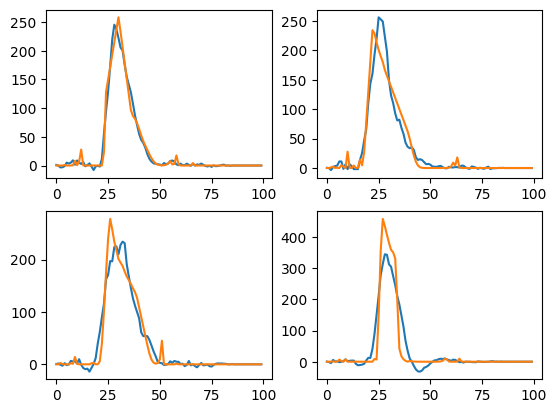

In [8]:
# Plot some results: truth vs prediction
ntest1 = 0 
ntest2 = 100 
ntest3 = 200
ntest4 = 400 
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(y_pred[ntest1,:])
axs[0, 0].plot(y_test.iloc[ntest1,:])
axs[0, 1].plot(y_pred[ntest2,:])
axs[0, 1].plot(y_test.iloc[ntest2,:])
axs[1, 0].plot(y_pred[ntest3,:])
axs[1, 0].plot(y_test.iloc[ntest3,:])
axs[1, 1].plot(y_pred[ntest4,:])
axs[1, 1].plot(y_test.iloc[ntest4,:])


In [9]:
y_test.to_csv('LR_ytest.csv')
pd.DataFrame(y_pred).to_csv('LR_ypred.csv')
X_test.to_csv('LR_inputs.csv')

In [10]:
files.download('LR_ytest.csv')
files.download('LR_ypred.csv')
files.download('LR_inputs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
normalized_mse = mean_squared_error(y_test,y_pred)/dfr_max**2